In [12]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt 

In [26]:
tickers = ['ITUB4.SA', 'ENBR3.SA', 'ABEV3.SA','PETR4.SA']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1') ['Adj Close']

In [27]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5297 entries, 2000-12-21 to 2022-02-01
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ITUB4.SA  5297 non-null   float64
 1   ENBR3.SA  5297 non-null   float64
 2   ABEV3.SA  5297 non-null   float64
 3   PETR4.SA  5297 non-null   float64
dtypes: float64(4)
memory usage: 206.9 KB


In [28]:
mydata.head()

,ITUB4.SA,ENBR3.SA,ABEV3.SA,PETR4.SA
Date,,,,
2000-12-21,1.839409,2.769063,0.859002,3.046554
2000-12-22,1.759681,2.769063,0.838645,3.067001
2000-12-25,1.759681,2.769063,0.838645,3.067001
2000-12-26,1.759167,2.769063,0.844755,3.046554
2000-12-27,1.818836,2.769063,0.936354,3.087447


In [29]:
mydata.tail()

,ITUB4.SA,ENBR3.SA,ABEV3.SA,PETR4.SA
Date,,,,
2022-01-26,24.353020,21.209999,15.00,33.869999
2022-01-27,24.472935,21.360001,15.40,33.880001
2022-01-28,24.772728,21.469999,14.93,32.540001
2022-01-31,25.312351,21.610001,14.97,32.349998
2022-02-01,25.490000,21.299999,14.85,33.000000


NORMALIZANDO COM 100 => P1/P0 *100
O INDEXADOR ILOC=(0) TRAZ A PRIMEIRA LINHA DE TODOS OS DADOS
com isso o grafico sempre começa no ponto incial de 100

In [30]:
mydata.iloc[0]

ITUB4.SA    1.839409
ENBR3.SA    2.769063
ABEV3.SA    0.859002
PETR4.SA    3.046554
Name: 2000-12-21 00:00:00, dtype: float64

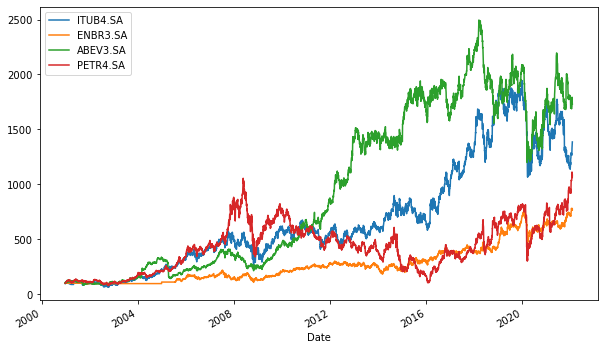

In [31]:
(mydata/mydata.iloc[0]*100).plot(figsize =(10,6));

Calculando a taxa de RETORNO do PORTIFÓLIO


In [32]:
returns = (mydata/mydata.shift(1))-1
returns.head()

,ITUB4.SA,ENBR3.SA,ABEV3.SA,PETR4.SA
Date,,,,
2000-12-21,NaN,NaN,NaN,NaN
2000-12-22,-0.043344,0.0,-0.023699,0.006712
2000-12-25,0.000000,0.0,0.000000,0.000000
2000-12-26,-0.000292,0.0,0.007286,-0.006667
2000-12-27,0.033919,0.0,0.108433,0.013423


In [40]:
weights =np.array([0.64, 0.25, 0.07, 0.03,])

In [41]:
np.dot(returns, weights)

array([        nan, -0.02919802,  0.        , ...,  0.00580453,
        0.01558366,  0.00094703])

In [42]:
annual_returns = returns.mean()*250
annual_returns

ITUB4.SA    0.187813
ENBR3.SA    0.136887
ABEV3.SA    0.177623
PETR4.SA    0.204196
dtype: float64

In [36]:
np.dot(annual_returns, weights)

0.18300628870859925

In [43]:
pfolio_1 = str(round(np.dot(annual_returns, weights),5)*100) + '%'
print (pfolio_1)

17.298%


para um segundo portifólio com pesos diferentes

In [44]:
weights_2 =np.array([0.50, 0.50, 0.25, 0.25])

In [45]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2) ,5)*100) + '%'
print (pfolio_1)
print (pfolio_2)

17.298%
25.779999999999998%


In [46]:
weights_3 =np.array([0.50, 0.25, 0.50, 0.25])

In [48]:
pfolio_3 = str(round(np.dot(annual_returns, weights_3) ,5)*100) + '%'
print (pfolio_1)
print (pfolio_2)
print (pfolio_3)

17.298%
25.779999999999998%
26.799%


In [49]:
weights_4 =np.array([0.50, 0.25, 0.25, 0.50])


In [50]:
pfolio_4 = str(round(np.dot(annual_returns, weights_4) ,5)*100) + '%'
print (pfolio_1)
print (pfolio_2)
print (pfolio_3)
print (pfolio_4)

17.298%
25.779999999999998%
26.799%
27.462999999999997%
